# Naive MNIST

> hello world

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

## load data

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
def data_summary(images, labels):
    print(f"{images.shape=}")
    print(f"{len(labels)=}")
    print(labels)

In [4]:
data_summary(train_images, train_labels)

images.shape=(60000, 28, 28)
len(labels)=60000
[5 0 4 ... 5 6 8]


In [5]:
data_summary(test_images, test_labels)

images.shape=(10000, 28, 28)
len(labels)=10000
[7 2 1 ... 4 5 6]


## preprocess data

In [6]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

## network architecture

In [7]:
model = keras.Sequential(
    [
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

Metal device set to: Apple M1 Max


2023-01-22 09:23:40.290118: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-22 09:23:40.290249: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [9]:
epochs = 10
batch_size = 128

history = model.fit(
    train_images,
    train_labels,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(test_images, test_labels),
)

Epoch 1/10


2023-01-22 09:23:40.378844: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  7/469 [..............................] - ETA: 4s - loss: 1.4687 - accuracy: 0.5446  

2023-01-22 09:23:40.602713: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


465/469 [============================>.] - ETA: 0s - loss: 0.2608 - accuracy: 0.9234

2023-01-22 09:23:43.519018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 3s 7ms/step - loss: 0.2599 - accuracy: 0.9237 - val_loss: 0.1294 - val_accuracy: 0.9609
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1043 - accuracy: 0.9691 - val_loss: 0.0889 - val_accuracy: 0.9724
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0689 - accuracy: 0.9797 - val_loss: 0.0732 - val_accuracy: 0.9778
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0499 - accuracy: 0.9851 - val_loss: 0.0659 - val_accuracy: 0.9799
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0382 - accuracy: 0.9884 - val_loss: 0.0629 - val_accuracy: 0.9809
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0287 - accuracy: 0.9913 - val_loss: 0.0739 - val_accuracy: 0.9782
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0216 - accuracy: 0.9934 - val_loss: 0.0701 - val_accuracy: 0.9805
Epoch 8/10
469/46

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## make prediction

In [11]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)

1/1 [==============================] - 0s 45ms/step


2023-01-22 09:24:10.853619: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [12]:
predictions[0]

array([1.0533358e-11, 1.3013403e-14, 1.0290397e-08, 5.0711683e-06,
       1.9953244e-15, 2.4978870e-11, 2.1093784e-18, 9.9999487e-01,
       2.2518294e-09, 4.8706863e-08], dtype=float32)

In [13]:
predictions[0].argmax()

7

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"{test_acc=}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0708 - accuracy: 0.9817
test_acc=0.98170006275177


In [15]:
def viz_history(history):
    xs = list(range(1, 1 + len(history.history["accuracy"])))
    plt.plot(xs, history.history["accuracy"], label="training accuracy")
    plt.plot(xs, history.history["val_accuracy"], label="validation accuracy")
    plt.legend(loc="lower right")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.xlim(1, len(xs))
    plt.show()

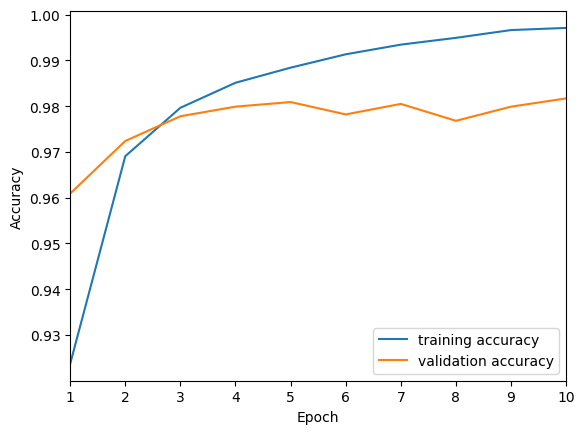

In [16]:
viz_history(history)